In this analysis,I explore the unique features, traits, and behaviors of different dog breeds. This data helps us understand the special qualities that make each breed stand out, giving us knowledge while preferring a particular dog breed as their pet.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
pip install seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('dogs-ranking-dataset.csv')
df.shape

(87, 19)

In [6]:
df.head()

,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


In [7]:
df.Breed.value_counts()

Border Terrier          1
Doberman Pinscher       1
Boxer                   1
Bernese Mountain Dog    1
French Bulldog          1
                       ..
Beagle                  1
Miniature Schnauzer     1
Affenpinscher           1
Pug                     1
Bulldog                 1
Name: Breed, Length: 87, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['breed', 'type', 'score', 'popularity_ranking', 'size', 'intelligence',
       'congential_ailments', 'score_for_kids', 'size.1', '$lifetime_cost',
       'intelligence_rank', 'intelligence_%', 'longevity(years)',
       'number_of_genetic_ailments', 'genetic_ailments', 'purchase_price',
       'food_costs_per_year', 'grooming_frequncy', 'suitability_for_children'],
      dtype='object')

In [10]:
df.describe()

,score,popularity_ranking,size,score_for_kids,intelligence_rank,longevity(years),number_of_genetic_ailments,suitability_for_children
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.603678,44.000000,1.954023,3.681839,41.540230,11.117701,1.689655,1.540230
std,0.570288,25.258662,0.819927,0.655736,21.979803,1.938465,1.707101,0.678655
min,0.990000,1.000000,1.000000,1.860000,1.000000,6.290000,0.000000,1.000000
25%,2.185000,22.500000,1.000000,3.180000,27.000000,10.000000,0.500000,1.000000
50%,2.710000,44.000000,2.000000,3.810000,43.000000,11.560000,1.000000,1.000000
75%,3.035000,65.500000,3.000000,4.115000,59.000000,12.430000,2.000000,2.000000
max,3.640000,87.000000,3.000000,4.990000,80.000000,16.500000,9.000000,3.000000


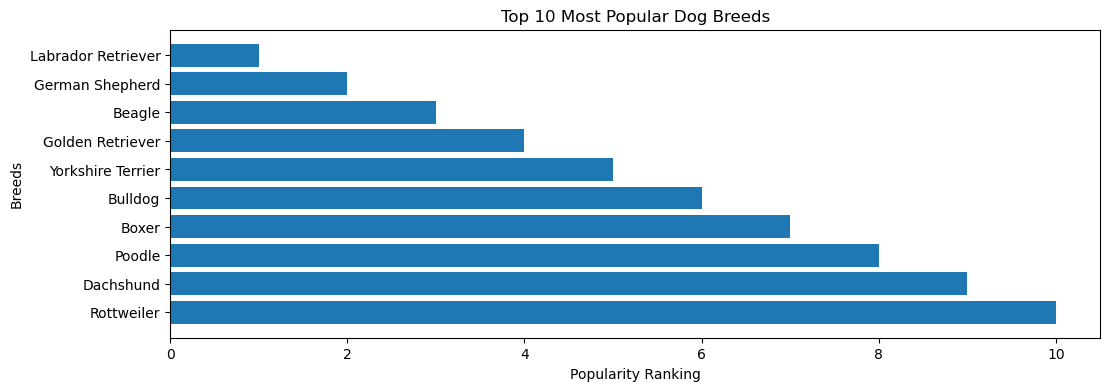

In [11]:
top_10_popular = df.sort_values('popularity_ranking').head(10)

plt.figure(figsize=(12, 4))
plt.barh(top_10_popular['breed'][::-1], top_10_popular['popularity_ranking'][::-1])
plt.xlabel('Popularity Ranking')
plt.ylabel('Breeds')
plt.title('Top 10 Most Popular Dog Breeds')
plt.show()

There is a relatively high positive correlation between score for kids and longevity, suggesting that kid-friendly breeds tend to have longer lifespans. This relationship is intuitive because dogs that are kid-friendly tend to form strong emotional bonds with their human families. This emotional connection and the companionship they provide can contribute to the overall well-being and happiness of both the dog and the family members, potentially leading to a longer lifespan of the dog.

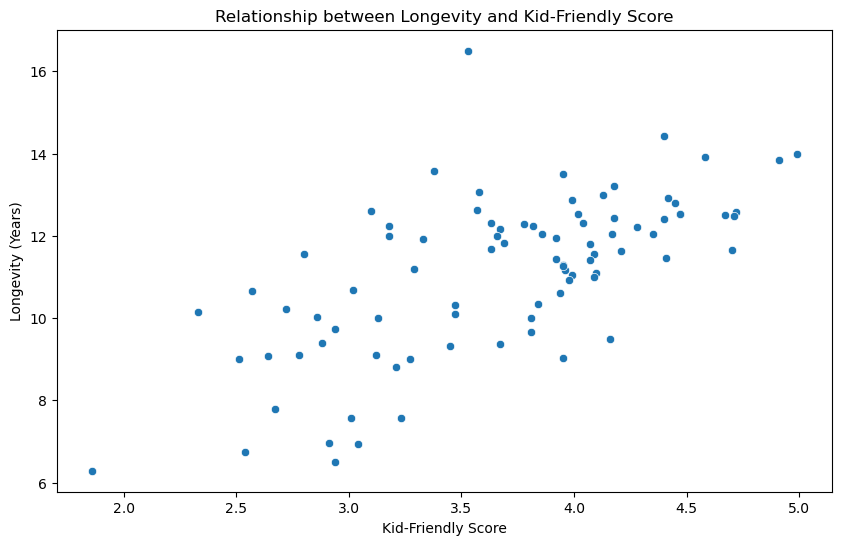

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score_for_kids', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Kid-Friendly Score')
plt.title('Relationship between Longevity and Kid-Friendly Score')
plt.show()

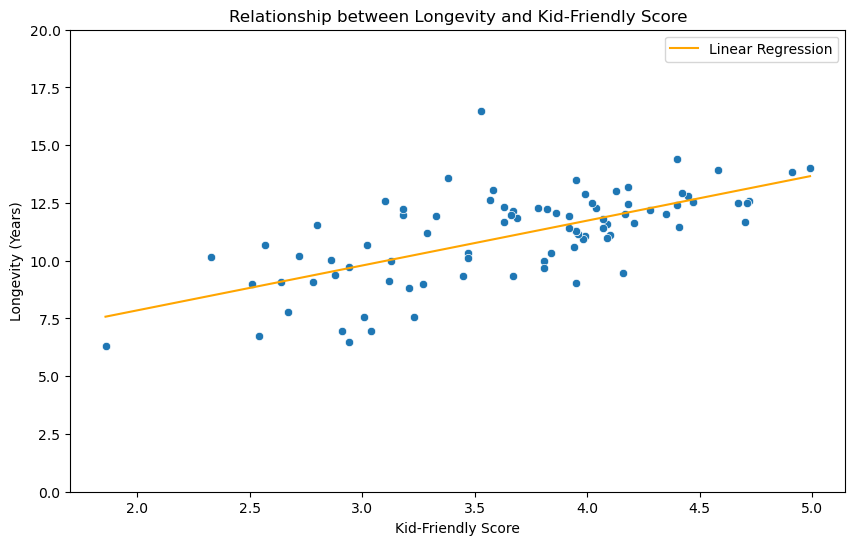

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score_for_kids', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Kid-Friendly Score')
plt.title('Relationship between Longevity and Kid-Friendly Score')

X = df['score_for_kids'].values.reshape(-1,1)
y = df['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(df['score_for_kids'].min(), df['score_for_kids'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)
plt.show()

In [13]:
df.intelligence.value_counts()

Average          21
Above average    19
Fair             15
Excellent        11
Lowest           11
Brightest        10
Name: intelligence, dtype: int64

In [14]:
intelligence_mapping = {
    'Lowest': 1,
    'Fair': 2,
    'Average': 3,
    'Above average': 4,
    'Excellent': 5,
    'Brightest': 6
}

df['intelligence_mapped'] = df['intelligence'].map(intelligence_mapping)
df.head()

,breed,type,score,popularity_ranking,size,intelligence,congential_ailments,score_for_kids,size.1,$lifetime_cost,intelligence_rank,intelligence_%,longevity(years),number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequncy,suitability_for_children,intelligence_mapped
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1,4
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1,4
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1,3
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1,4
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1,5


In [17]:
df.type.value_counts()

sporting        15
working         14
toy             13
hound           13
terrier         12
non-sporting    10
herding         10
Name: type, dtype: int64

In [18]:
df.genetic_ailments.value_counts()

none                                                                                                   22
hip problems                                                                                           12
heart problems                                                                                          3
deafness, hip problems                                                                                  2
knee problems                                                                                           2
eye, hip problems                                                                                       2
heart, spine, blood clotting disorders                                                                  1
hip problems, heart defects                                                                             1
kidney, eye problems, anaemia                                                                           1
meningitis, elbow + hip problems, complex immu

Breeds categorized as 'working', 'herding', and 'sporting' exhibit the highest proportion of genetic ailments. Understanding these breed-specific predispositions is essential for informed breeding practices and responsible pet ownership.

In [21]:
df[['breed', '$lifetime_cost', 'score']]

,breed,$lifetime_cost,score
0,Border Terrier,"$22,638",3.61
1,Cairn Terrier,"$21,992",3.53
2,Siberian Husky,"$22,049",3.22
3,Welsh Springer Spaniel,"$20,224",3.34
4,English Cocker Spaniel,"$18,993",3.33
...,...,...,...
82,Alaskan Malamute,"$21,986",1.82
83,Bloodhound,"$13,824",1.66
84,Chow Chow,"$15,898",1.76
85,Akita,"$20,994",1.95


# In the end I just want to conclude that through my analysis, it'll be easy for the dog lover while choosing a particular dog breed to pet depending on the various factors and necessities.